In [156]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#import plotly for interactive graphs
import plotly.express as px 


In [157]:
#Display option to see more columns. Usefull to see all the columns of Dummy variables for Machine Learning
pd.set_option('display.max_columns', 120)

#make the charts look better for displays with retina resolution 
%config InlineBackend.figure_format = 'retina'

In [158]:
#Read in milk collected annual data
df_MilkCollected = pd.read_csv('C:\\Project CA2\\Data\\milk products annual.csv')

In [159]:
df_MilkCollected.head()

,DATAFLOW,LAST UPDATE,freq,dairyprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2017,57.36,p
1,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2018,64.39,NaN
2,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2019,56.82,NaN
3,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2020,56.27,NaN
4,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2021,58.94,NaN


In [160]:
df_MilkCollected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     9392 non-null   object 
 1   LAST UPDATE  9392 non-null   object 
 2   freq         9392 non-null   object 
 3   dairyprod    9392 non-null   object 
 4   unit         9392 non-null   object 
 5   geo          9392 non-null   object 
 6   TIME_PERIOD  9392 non-null   int64  
 7   OBS_VALUE    8334 non-null   float64
 8   OBS_FLAG     1831 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 660.5+ KB


In [161]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected.drop(['DATAFLOW', 'LAST UPDATE','freq','unit','OBS_FLAG'], axis=1,inplace=True)

In [162]:
df_MilkCollected.head(20)

,dairyprod,geo,TIME_PERIOD,OBS_VALUE
0,D1110D,AL,2017,57.36
1,D1110D,AL,2018,64.39
2,D1110D,AL,2019,56.82
3,D1110D,AL,2020,56.27
4,D1110D,AL,2021,58.94
5,D1110D,AT,1995,2290.00
6,D1110D,AT,1996,2343.00
7,D1110D,AT,1997,2420.00
8,D1110D,AT,1998,2430.00
9,D1110D,AT,1999,2535.00


In [163]:
#Rename colunms to something more meaningful 
df_MilkCollected = df_MilkCollected.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [164]:
#Get summary statistics for the dataframe
df_MilkCollected.describe()

,Year,Amount
count,9392.000000,8334.000000
mean,2004.290779,1732.849292
std,13.798807,10104.946443
min,1968.000000,0.000000
25%,1996.000000,10.442500
50%,2008.000000,80.420000
75%,2015.000000,460.590000
max,2021.000000,157382.420000


In [165]:
df_MilkCollected_Annual = df_MilkCollected.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')

In [166]:
df_MilkCollected_Annual.head()

Product     D1110D  D1200DME    D2100  D2200V  D3100_X_3113   D3113   D3200  \
Year Geo                                                                      
1968 BE    2909.55       NaN   579.00    6.80         19.13  121.08   36.36   
     DE   18318.09       NaN  3138.00  185.56         27.84  409.00  443.02   
     DK    4767.03       NaN      NaN   32.44           NaN     NaN     NaN   
     FR   19245.86       NaN  2370.18   44.14         52.19  692.48  190.71   
     IE        NaN       NaN      NaN     NaN           NaN     NaN     NaN   

Product   D4100   D6000   D7121  
Year Geo                         
1968 BE     NaN   76.21   31.81  
     DE     NaN  523.58  438.48  
     DK     NaN  159.55  105.50  
     FR     NaN  500.50  649.87  
     IE     NaN   73.25     NaN

In [167]:
#Reset the index
df_MilkCollected_Annual = df_MilkCollected_Annual.reset_index( )

In [168]:
df_MilkCollected_Annual.head()

Product,Year,Geo,D1110D,D1200DME,D2100,D2200V,D3100_X_3113,D3113,D3200,D4100,D6000,D7121
0,1968,BE,2909.55,NaN,579.00,6.80,19.13,121.08,36.36,NaN,76.21,31.81
1,1968,DE,18318.09,NaN,3138.00,185.56,27.84,409.00,443.02,NaN,523.58,438.48
2,1968,DK,4767.03,NaN,NaN,32.44,NaN,NaN,NaN,NaN,159.55,105.50
3,1968,FR,19245.86,NaN,2370.18,44.14,52.19,692.48,190.71,NaN,500.50,649.87
4,1968,IE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.25,NaN


In [169]:
#sns.boxplot(df_MilkCollected_Annual=df_MilkCollected_Annual['Milk'],showmeans=True) 

In [170]:

#sns.set(rc = {'figure.figsize':(12,8)})
#sns.set(font_scale=1)
#myfig = sns.lineplot(x = 'Year', y = 'D6000', data = x)
#plt.show()

In [171]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream, Butter and Cheese produced
df_MilkCollected_Annual.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100'], axis=1,inplace=True)

In [172]:
#Rename product columns to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter','D7121':'Cheese' }) 

In [173]:
df_MilkCollected_Annual.head()

Product,Year,Geo,Raw Milk Deliveries,Milk,Cream,Butter,Cheese
0,1968,BE,2909.55,579.00,6.80,76.21,31.81
1,1968,DE,18318.09,3138.00,185.56,523.58,438.48
2,1968,DK,4767.03,NaN,32.44,159.55,105.50
3,1968,FR,19245.86,2370.18,44.14,500.50,649.87
4,1968,IE,NaN,NaN,NaN,73.25,NaN


<AxesSubplot:xlabel='Cream', ylabel='Geo'>

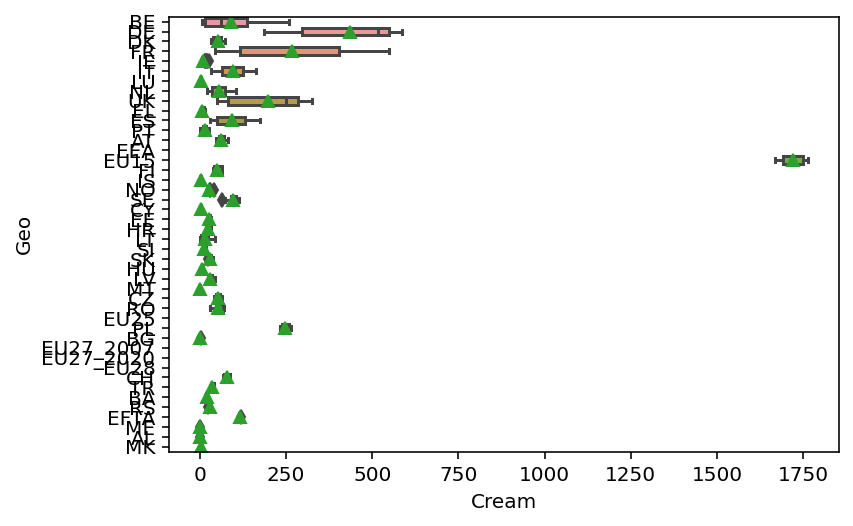

In [174]:
#First look at a box plot
sns.boxplot(x=df_MilkCollected_Annual['Cream'],y = df_MilkCollected_Annual['Geo'],showmeans=True) 

In [175]:
#Read in milk collected monthly data
df_MilkCollected = pd.read_csv('C:\\Project CA2\\Data\\milk products monthly.csv')

In [176]:
df_MilkCollected.head()

,DATAFLOW,LAST UPDATE,freq,dairyprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-01,0.0,NaN
1,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-02,0.0,NaN
2,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-03,0.0,NaN
3,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-04,0.0,NaN
4,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-05,0.0,NaN


In [177]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected.drop(['DATAFLOW', 'LAST UPDATE','freq','unit','OBS_FLAG'], axis=1,inplace=True)

In [178]:
#Rename colunms to something more meaningful 
df_MilkCollected = df_MilkCollected.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [179]:
df_MilkCollected_Monthly = df_MilkCollected.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')

In [180]:
#Reset the index
df_MilkCollected_Monthly = df_MilkCollected_Monthly.reset_index( )

In [181]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream, Butter and Cheese produced
df_MilkCollected_Monthly.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100'], axis=1,inplace=True)

In [182]:
#Rename product columns to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter','D7121':'Cheese' }) 

In [183]:
df_MilkCollected_Monthly.head()

Product,Year,Geo,Raw Milk Deliveries,Milk,Cream,Butter,Cheese
0,1968-01,BE,80.860,49.00,0.44,3.26,2.91
1,1968-01,DE,691.500,251.00,11.24,41.09,33.96
2,1968-01,DK,173.130,NaN,2.58,11.38,8.78
3,1968-01,FR,636.175,221.36,3.01,30.97,48.23
4,1968-01,IE,NaN,NaN,NaN,1.16,NaN


In [184]:
#Read in file with Country, Alpha 2 and Alpha 3 codes
df_CountryCode = pd.read_csv('C:\\Project CA2\\Data\\ISO Codes.csv')

In [185]:
df_CountryCode.head()

,Country,Geo,Code
0,Albania,AL,ALB
1,Algeria,DZ,DZA
2,American Samoa,AS,ASM
3,Andorra,AD,AND
4,Angola,AO,AGO


In [186]:
df_MilkCollected_Annual.shape

(1072, 7)

In [187]:
df_MilkCollected_Annual = pd.merge(df_CountryCode,df_MilkCollected_Annual,on='Geo')

In [188]:
df_MilkCollected_Annual.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Cheese
0,Albania,AL,ALB,2017,57.36,8.93,0.21,1.65,3.82
1,Albania,AL,ALB,2018,64.39,13.47,0.46,2.63,3.91
2,Albania,AL,ALB,2019,56.82,10.15,0.23,0.42,2.28
3,Albania,AL,ALB,2020,56.27,14.48,0.29,0.51,3.15
4,Albania,AL,ALB,2021,58.94,12.19,0.29,0.63,3.84


In [189]:
x = df_MilkCollected_Annual.query("Year==2019")
x.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Cheese
2,Albania,AL,ALB,2019,56.82,10.15,0.23,0.42,2.28
29,Austria,AT,AUT,2019,3139.80,784.77,72.94,36.53,205.06
83,Belgium,BE,BEL,2019,4288.22,676.46,253.97,111.96,104.87
93,Bosnia and Herzegovina,BA,BIH,2019,260.76,151.28,22.51,1.60,7.90
108,Bulgaria,BG,BGR,2019,658.77,74.90,2.79,1.05,82.82


In [190]:
fig = px.choropleth(x, 
 locations="Code", # colunm containing ISO 3166 country codes 
 color="Butter",                 
 hover_name="Country", # column to display in hover information 
 color_continuous_scale=px.colors.sequential.Plasma) 

fig.update_layout( 
 # add a title text for the plot 
 title_text = 'Butter Produced - 2019', 
 geo_scope = 'europe' 
# can be set to north america | south america | africa | asia | europe | usa 
) 

fig.show() 
